# Regression Model (Simple Logistic Regression)

# Import Libraries for Preeprocessing

In [1]:
import os
import sys
sys.path.append(os.path.dirname((os.path.abspath(''))))
from data.preprocessing import load_data, preprocess, train_tfidf, split_data, upsampling, setup

C:\Users\maetu\Data_mining\src\data\preprocessing.py:17: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maetu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maetu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maetu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import matplotlib.pyplot as plt
import requests
import io
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

## Load and Preprocess Data:

In [3]:
df = load_data()
df.head()

Using custom data configuration default
Reusing dataset tweets_hate_speech_detection (C:\Users\maetu\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2)


  0%|          | 0/1 [00:00<?, ?it/s]

,label,tweet
0,0,@user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [4]:
# Create preprossesed data
df['preprocessed'] = preprocess(df['tweet'], True, True, True, True)
df.head()

,label,tweet,preprocessed
0,0,@user when a father is dysfunctional and is so...,"[user, father, dysfunctional, selfish, drags, ..."
1,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, lyft, credit, cant, use, ..."
2,0,bihday your majesty,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, urmobile, phon..."
4,0,factsguide: society now #motivation,"[factsguide, society, motivation]"


In [7]:
# Create trained tfidf vectorizer
tfidf = train_tfidf(df['preprocessed'])

#tf = TfidfVectorizer(stop_words='english')
#X_tf_vec = tf.fit(df['preprocessed'])

In [8]:
# Split data on specified column
df_train , df_test = split_data(df, 'preprocessed')

In [9]:
# Upsample data
df_train_up = upsampling(df_train)

In [10]:
Xt_train = tfidf.transform(df_train_up['preprocessed'])
Xt_test = tfidf.transform(df_test['preprocessed'])

## Model Building using a Tf-Idf Vectorizer:

In [69]:
X = tfidf.transform(df_train['preprocessed'])

print(X.shape)

(25569, 44531)


In [73]:
y = df_train['label']

In [74]:
print('There is {} training data, of which {}% is hate speech '.format(df_train_up['label'].count(), round(df_train_up['label'].sum()/df_train_up['label'].count()*100,2)))
print('There is {} test data, of which {}% is hate speech '.format(df_test['label'].count(), round(df_test['label'].sum()/df_test['label'].count()*100,2)))

There is 47550 training data, of which 50.0% is hate speech 
There is 6393 test data, of which 7.01% is hate speech 


In [75]:
(X_train, X_test, y_train, y_test) = ms.train_test_split(X, y, test_size=0.2, random_state = 17, stratify=y)

In [87]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score:', score)
    return model

In [88]:
model = simple_logistic_classify(Xt_train, y_train, Xt_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [47550, 20455]

In [78]:
#Evaluation of a Model's performance
def evaluate(xTest, yTest, vectorizer):
    print('Results for Logistic Regression using a ' + str(vectorizer) + ' vectorizer:')
    print(f'The hit rate with the simple logistic regression is approx. {round(100*model.score(xTest, yTest),2)}%')
    print('Precision: %.3f' % precision_score(yTest, model.predict(xTest)))
    print('Recall: %.3f' % recall_score(yTest, model.predict(xTest)))
    print('Accuracy: %.3f' % accuracy_score(yTest, model.predict(xTest)))
    print('F1 Score: %.3f' % f1_score(yTest, model.predict(xTest)))

### Evaluation:

In [79]:
evaluate(X_test, y_test, 'Tf-Idf')

Results for Logistic Regression using a Tf-Idf vectorizer:
The hit rate with the simple logistic regression is approx. 94.6%
Precision: 0.928
Recall: 0.251
Accuracy: 0.946
F1 Score: 0.395


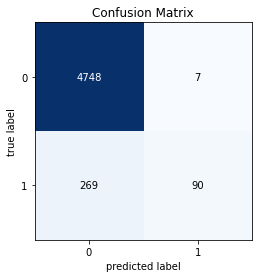

In [80]:
# Confusion-Matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title("Confusion Matrix")
plt.show()